<a href="https://colab.research.google.com/github/adbemper-netizen/data-mining-home-work/blob/main/1125%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%9F%BA%E7%A4%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 演習

In [ ]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[scikit-learn](https://scikit-learn.org/)ライブラリでは機械学習の処理を行うためのさまざまな機能が提供されています．

回帰に用いられるデータセットの例として，以下はscikit-learnから取得可能なデータセットの1つであるDiabetesデータセットをもとに作成したデータフレームを示しています．

具体的には，scikit-learnのdatasetsモジュールの関数[`load_diabetes`](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_diabetes.html)を用いて，Diabetesデータセットからデータフレーム`diabetes_df`を作成しています．

データフレームの各行は事例となる患者に対応しており，各患者は年齢，性別，BMI，血圧，血清測定値などの特徴で表されています．
また，ラベル（データフレームの「target」の列）として各患者の疾患の進行度が連続値として付与されています．

このデータセットをもとに，患者の特徴量を入力として，その患者の疾患の進行度を出力として予測するモデルを学習することが考えられます．

In [ ]:
# データセットの読み込み
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [ ]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


scikit-learnライブラリを用いて，先に示したDiabetesデータセットをもとにしたモデルの学習と予測を実際に行ってみます．

scikit-learnの[`LinearRegression`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html)クラスは，回帰タスクのモデルのクラスとなります．
- オブジェクトのもととなる情報を定義したものをクラスと呼びます．

以下では，同クラスを用いて，訓練データをもとにモデルのパラメータの学習を行っています．
- モデルに与える入力として，データフレーム`diabetes_df`の「bmi」の列から2次元配列`X_train`（形状は`(m, 1)`）を作成します．
  - データフレームの`values`属性は元のデータフレームを配列で表現したものを返します．
- また，モデルに与えるラベルとして，「target」の列から1次元配列`y_train`（形状は`(m,)`）を作成します．
- `LinearRegression`クラスのオブジェクトを作成し，同オブジェクトの`fit`メソッドに`X_train`と`y_train`を与えて呼び出します．これにより，モデルのパラメータの推定が行われます．
  - クラスに基づいて作成された具体的なオブジェクトのことをインスタンスと呼びます．
- 同オブジェクトの`coef_`属性と`intercept_`属性には，それぞれ入力の各特徴に対する係数となるパラメータ，切片となるパラメータが含まれています．


In [ ]:
# 回帰モデルの学習
from sklearn.linear_model import LinearRegression
X_train = diabetes_df['bmi'].values.reshape(-1, 1)
y_train = diabetes_df['target'].values
model = LinearRegression()
model.fit(X_train, y_train)
print(f'w: {model.coef_[0]:.2f}')
print(f'b: {model.intercept_:.2f}')

w: 949.44
b: 152.13


`LinearRegression`クラスのオブジェクトの`predict`メソッドに，新たな入力となるデータを2次元配列として与えて呼び出すことで，入力に対するモデルの予測結果の値を要素とする配列が返ります．

In [ ]:
# 回帰モデルを用いた予測
X_test = np.array([[0.1]])
prediction = model.predict(X_test)
print(f'prediction: {prediction[0]:.2f}')

prediction: 247.08


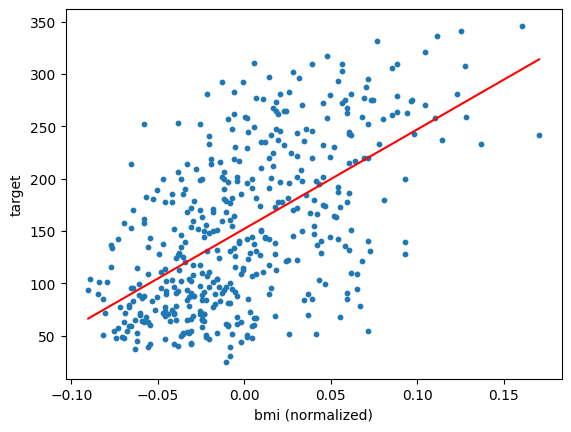

In [ ]:
# 散布図と回帰直線
x_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.scatter(X_train, y_train, s=10)
plt.plot(x_line, y_line, c='red', lw=1.5)
plt.xlabel('bmi (normalized)')
plt.ylabel('target')
plt.show()